# Project: Investigate  Clinic Appointments Dataset 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report is an investigation about medical appointments which was collected in Brazil. This investigation aims to unfold some of the reasons why patients skip appointments.


### Importing the Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [2]:
df= pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

In this section, I will explore the general properties of the dataset and inspect for nulls/duplicated values. Also, I will check data types and see if adding new columns is necessary 

### General Properties

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [4]:
df.shape

(110527, 14)

In [5]:
sum(df.duplicated())

0

### Luckly the dataset does not contain any null values nor duplicated values. However, ScheduledDay and AppointmentDay columns type need to be changed.

In [6]:
df['ScheduledDay'] = pd.to_datetime(df[('ScheduledDay')])
df['AppointmentDay'] = pd.to_datetime(df[('AppointmentDay')])
print(df['AppointmentDay'].head())
print('\n')
print(df['ScheduledDay'].head())

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
2   2016-04-29 00:00:00+00:00
3   2016-04-29 00:00:00+00:00
4   2016-04-29 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]


0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]


### To identify the time  difference between AppointmentDay and ScheduledDay I will create a new column

In [7]:
#('ScheduledDay')]- df[('AppointmentDay') because ScheduledDay is the newest
df['Time_diff']=df[('ScheduledDay')]- df[('AppointmentDay')]
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_diff
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days 18:38:08
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days 16:08:27
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days 16:19:04
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days 17:29:31
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days 16:07:23


In [8]:
df['Time_diff'].max()

Timedelta('6 days 13:49:20')

### If you have a (-) that's mean that patient had scheduled the appointment prior in time, in the next cell I will check if you have (+) which mean that patient had scheduled the appointment after the patient date(faulty info)

In [9]:
df[df['Time_diff'] > '+1 days'].count()
#Great we don't have any!

PatientId         5
AppointmentID     5
Gender            5
ScheduledDay      5
AppointmentDay    5
Age               5
Neighbourhood     5
Scholarship       5
Hipertension      5
Diabetes          5
Alcoholism        5
Handcap           5
SMS_received      5
No-show           5
Time_diff         5
dtype: int64

In [10]:
#Total patinet the clinic serve
niq=df['PatientId'].nunique()

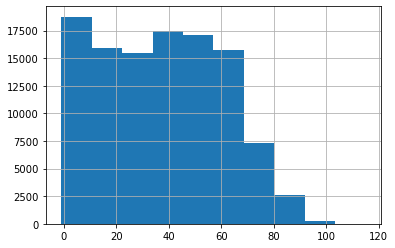

In [11]:
df['Age'].hist();

In [12]:
df['Age'].min()
#Some cleaning should be done on age

-1

In [13]:
df[df['Age'] < 0 ].head()
#Great so it's only one recored, Which I will remove in the next section

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_diff
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,0 days 08:58:13


### Data Cleaning 

#### Droping faulty recored 

In [14]:
#age =df.loc[df['Age'] < 0]
#df.drop(age , inplace=True)
#print(age)
df.drop([99832], inplace=True)
#df = df[df.line_race != 0]
#df = df.drop(df[<df['Age'] < 0 >].index)

In [15]:
df[df['Age'] < 0 ].head()
#Great now age is clean and ready to be used for analysis 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_diff


<a id='eda'></a>
## Exploratory Data Analysis

In this section I will explore two reserch quistions are stated below
### Research Question 1:  Are the patines who recived an SMS messege  more likely to show up?

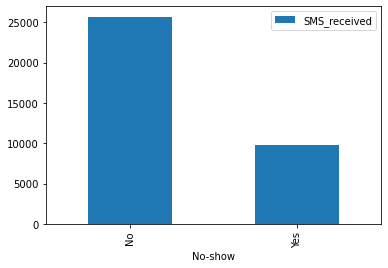

In [16]:
# I will only use two columns, thus I will use iloc 
sms_df=df.iloc[:,12:14]
sms= sms_df.groupby('No-show')
sms.sum().plot.bar();


#### Patients who received an SMS and showed up are much higher than patients who did receive an SMS and didn't show up. Sending SMS messages to patients increases the likeability of patients not skipping appointments 

### Research Question 2: in what neighbourhoods the patients who didn't show up lives?

In [17]:
df_yes = df[df['No-show'] == "Yes"]
print(df_yes)
#yes=df.query('No-show == "Yes"')

           PatientId  AppointmentID Gender              ScheduledDay  \
6       7.336882e+14        5630279      F 2016-04-27 15:05:12+00:00   
7       3.449833e+12        5630575      F 2016-04-27 15:39:58+00:00   
11      7.542951e+12        5620163      M 2016-04-26 08:44:12+00:00   
17      1.479497e+13        5633460      F 2016-04-28 09:28:57+00:00   
20      6.222575e+14        5626083      F 2016-04-27 07:51:14+00:00   
...              ...            ...    ...                       ...   
110484  5.133650e+14        5772155      F 2016-06-03 14:43:56+00:00   
110492  6.456342e+14        5786741      M 2016-06-08 08:50:19+00:00   
110496  8.544295e+13        5779046      F 2016-06-06 17:35:38+00:00   
110515  6.456342e+14        5778621      M 2016-06-06 15:58:05+00:00   
110516  6.923772e+13        5780205      F 2016-06-07 07:45:16+00:00   

                  AppointmentDay  Age   Neighbourhood  Scholarship  \
6      2016-04-29 00:00:00+00:00   23      GOIABEIRAS            

In [18]:
hoods= df_yes.groupby(['Neighbourhood',('No-show')],as_index=False)['PatientId'].count().nlargest(10,'PatientId')
print(hoods)

        Neighbourhood No-show  PatientId
38     JARDIM CAMBURI     Yes       1465
43        MARIA ORTIZ     Yes       1219
36            ITARARÉ     Yes        923
58        RESISTÊNCIA     Yes        906
10             CENTRO     Yes        703
40  JESUS DE NAZARETH     Yes        696
39    JARDIM DA PENHA     Yes        631
9           CARATOÍRA     Yes        591
77         TABUAZEIRO     Yes        573
8              BONFIM     Yes        550


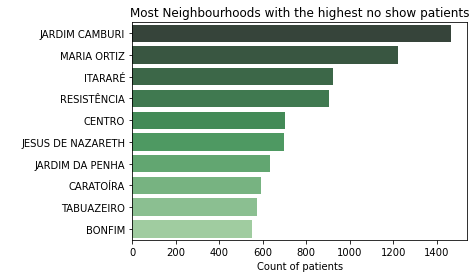

In [41]:
sns.barplot(x='PatientId',y='Neighbourhood',data=hoods,palette="Greens_d")
plt.ylabel(" ")
plt.xlabel("Count of patients");
plt.title("Most Neighbourhoods with the highest no show patients");


A large number of skipped appointments are by patients living in JARDIM CAMBURI and MARIA ORTIZ. The clinic can reach out to patients who live in those two areas to gain further understanding of why patients don't make it to the appointment.

### Now I will explore wich variable effect the likablity of attainding the appointment the most

In [20]:
#df['No-show'] = df['No-show'].replace({'Yes':1,'No':0})
#df.head()

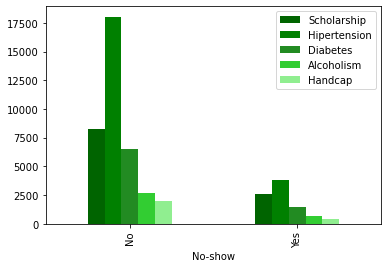

In [52]:
df[['Scholarship','No-show','Hipertension','Diabetes','Alcoholism','Handcap']].groupby(by='No-show').sum().plot.bar(color=['#006400','#008000','#228B22','#32CD32','#90EE90']);
#plt.barplot(x=data=D)



#plt.palette="Greens_d"



#df_yes.groupby('Age',as_index=False).sum()
#p_id=df[('PatientId'),('No-show')].value_counts()
#print(p_id)
#p_id.groupby(by='No-show').sum()

The values of the selected columns are in 0,1 format. This means that the sum will reflect the pt with these certain conditions and exclude the ones without it. from the graph, we can conclude that pts with hypertension are the most group who are likely to skip appointments, wheres when comparing pt with hibernation with other groups who don't skip they are the ones who are least likely to skip. This can be explained by the multiple records for each patient.
The goal of this graph is to know which group is the most likely to skip appointments. However, I think it can be better approached in a different way.

###### <a id='conclusions'></a>
## Conclusions
In this report I have investigated two questions.one is about who sending an SMS message will effect patients likeability of showing up and the other one is to investigate about most neighborhoods of the skipping rate. Sending SMS messages will definitely increase the showing up rate and there are some neighborhoods that have a significant number of skipped appointments.
The analysis I have conducted to answer the second research question which is in what neighborhoods the patients who didn't show up lives did not consider unique patients, that's mean if there is a neighborhood where multiple patient lives visit the clinic frequently this will make the visit from the particular neighborhood are high. 